# A Look at Bicycle Commuting and Public Health in the United States


### Introduction

The U.S. Department of Transportation recently partnered with the Centers for Disease Control (CDC) and the American Public Health Association (APHA) to release data on transportation and public health indicators for each U.S. state and metropolitan area. The purpose of the data release, available via the [Transportation and Health Tool (THT)](https://www.transportation.gov/transportation-health-tool), is to provide practitioners with the data that they need to make informed decisions when planning changes to transportation infrastructure.

The purpose of this study is to perform exploratory data analysis on the DOT's publicly released aggregate cross-sectional dataset; with the overall objective of teasing out relationships between bicycle commuting and public health in the United States.

### Motivation

Research has linked active transportation and physical activity with public health outcomes. Using a similar aggregate cross-sectional dataset and bivariate regression analysis, a [recent study](https://www.researchgate.net/profile/Ralph_Buehler/publication/45721029_Walking_and_Cycling_to_Health_A_Comparative_Analysis_of_City_State_and_International_Data/links/0fcfd50c0b88ca4fe7000000.pdf) found that active transportation has a statistically significant negative relationship with diabetes and self-reported levels of obesity. If those associations are true, then it may be important to discover which forms of active transportation are the most effective in combating these negative health outcomes. 

In this study, I focus on state level data and develop a statistical model to evaluate the proposition that commuting by bike is a greater indicator of getting at least 10 minutes of physical activity during a commute than traveling by foot. I conjecture that cycling promotes staying active for longer periods of time because of the greater distances that can be covered on a bicycle––incentivizing a longer commute.

### Data

+ <b>Physical Activity from Transportation</b>: Measures the percentage of all trips made by foot or by bicycle that are at least 10 minutes long. Data come from the 2009 National Household Travel Survey (NHTS).
+ <b>Commute mode shares (by bicycle, walking, and automobile)</b>: Measures the percentage of workers aged 16 years and over who commute either by bicycle, by private vehicle (including car, truck, van, taxicab, and motorcycle), by public transportation (including bus, rail, and ferry), or by foot. Data come from the 2012 one-year estimates from the American Community Survey (ACS)
+ <b>Complete Streets Policy</b>: Categorical variable indicating whether or not a state or the metropolitan planning organization that serves the region or a given metro area has adopted a complete streets policy that requires or encourages a safe, comfortable, integrated transportation network for all users, regardless of age, ability, income, ethnicity, or mode of transportation.
+ <b>Alcohol-Impared Fatalities (DUI/DWI)</b>: Measures the rate of fatal traffic crashes that involve a driver who is impaired by alcohol, per 100,000 Residents. Data on fatalities come from the 2012 Fatality Analysis Reporting System (FARS). Population data come from the 2012 American Community Survey (ACS) 1-year estimates. 
+ <b>Proximity to major roadways</b>: Estimates the percentage of people who live within 200 meters, or approximately 650 feet, of a high traffic roadway that carries over 125,000 vehicles per day. Data on the location of roads and traffic levels come from the 2011 National Transportation Atlas Database; data on population come from the 2010 Census.
+ <b>Use of Federal Funds for Bicycle and Pedestrian Efforts</b>: Measures the percentage of federal transportation dollars that go to bicycle and pedestrian infrastructure projects.

A more detailed description of each indicator is available from the [DOT](https://www.transportation.gov/mission/health/indicator-profiles).

### Methodology

A linear regression model with heteroscedastically robust standard errors is used for parameter estimation. Residuals vs fitted values and QQ plots are assessed for statistical validation of the OLS model. 

### Results

The results from this study indicate that bicycle commuting is the only transportation mode that is statistically and positively associated with higher levels of physical activity from transportation at the state level (p < 0.05, adjusted R-squared = 0.761). The key insight being that bicycle commuting is more likely to get people moving for at least 10 minutes than commuting by foot. Increases in bicycle commuting at the state level may therefore lead to increases in physical activity in the general population–and by extension also decreases in certain negative health outcomes. 

### Limitations

Cross-sectional aggregate data essentially provides a snapshot in time. Therefore, the results of this study are correlational and not necessarily causal. 

In addition, it could be argued that physical activity from transportation and bike share of commuting are confounding variables because both are, in a sense, a measure of transportation by bicycle. The argument is valid. However, physical activity from transportation is measured as the percentage of *all* types of trips made by foot or by bicycle that are at least 10 minutes long, whereas commuting by bicycle is measured as the percentage of only *work* trips––without the time component. More importantly, the physical activity from transportation data was collected from the 2009 National Household Travel Survey (NHTS), whereas the bicycle commute share data comes from the 2012 one-year estimates from the American Community Survey (ACS), so there is also independence in the data samples. These distinctions may be sufficient to argue that the data generating process for each measure is independent. 

<hr>

## Contents 

1. Data Processing 
2. Data Visualization and Exploratory Data Analysis
3. Regression Analysis and Diagnostics


<hr>


Please feel free to share, and don't hesitate to reach out with comments or questions!

Enjoy!

Sebastian Quintero<br>
[sebastianquintero.co](http://sebastianquintero.co)

In [1]:
# Libraries

import pandas as pd
import numpy as np
from scipy import stats

from sklearn import preprocessing
number = preprocessing.LabelEncoder()

import statsmodels.api as sm

import seaborn as sns
sns.set(style='white', context='talk')
p = sns.color_palette('husl', 8)

import matplotlib.pyplot as plt
plt.rcParams["axes.facecolor"] = "#FFFFFF"
plt.rcParams["figure.facecolor"] = "#FFFFFF"
plt.rcParams["savefig.facecolor"] = "#FFFFFF"
plt.rcParams["savefig.facecolor"] = "#FFFFFF"
plt.rcParams["font.family"] = "sans-serif"
plt.rc('axes',edgecolor='#FFFFFF')
plt.rcParams['figure.dpi'] = 300

fig_size = (9, 6)

%matplotlib inline  


import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly import figure_factory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import chart_studio as py
# import colorlover as cl

import plotly.io as pio
pio.renderers.default = "notebook"

# 1. Data Processing

You can download a fresh version of the data file from [Data.gov](https://catalog.data.gov/dataset/transportation-and-health-tool-data), or just download the one I uploaded to the repo.* 

\* Note: The file in the repo has the state abbreviations added under the column called 'Code'.

\* <b>Update 2020</b>: Data.gov resource is no longer available, but the data is still hosted at the [Transportation and Health Tool (THT)](https://www.transportation.gov/transportation-health-tool).

In [2]:
### Reading the data and assessing data frame structure
df = pd.read_csv('BikeState.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 42 columns):
State                                                                    50 non-null object
Code                                                                     50 non-null object
Commute Mode Share - Auto: Raw Value                                     50 non-null float64
Commute Mode Share - Auto: Score                                         50 non-null int64
Commute Mode Share - Transit: Raw Value                                  50 non-null float64
Commute Mode Share - Transit: Score                                      50 non-null int64
Commute Mode Share - Bicycle: Raw Value                                  50 non-null float64
Commute Mode Share - Bicycle: Score                                      50 non-null int64
Commute Mode Share - Walk: Raw Value                                     50 non-null float64
Commute Mode Share - Walk: Score                                    

In [3]:
df.head()

,State,Code,Commute Mode Share - Auto: Raw Value,Commute Mode Share - Auto: Score,Commute Mode Share - Transit: Raw Value,Commute Mode Share - Transit: Score,Commute Mode Share - Bicycle: Raw Value,Commute Mode Share - Bicycle: Score,Commute Mode Share - Walk: Raw Value,Commute Mode Share - Walk: Score,...,Road Traffic Fatalities Exposure Rate - Pedestrian: Raw Value,Road Traffic Fatalities Exposure Rate - Pedestrian: Score,Seat Belt Use: Raw Value,Seat Belt Use: Score,Transit Trips per Capita: Raw Value,Transit Trips per Capita: Score,Use of Federal Funds for Bicycle and Pedestrian Efforts: Raw Value,Use of Federal Funds for Bicycle and Pedestrian Efforts: Score,Vehicle Miles Traveled per Capita: Raw Value,Vehicle Miles Traveled per Capita: Score
0,Alabama,AL,0.95,5,0.00,17,0.00,7,0.01,4,...,122.4,6,0.90,71,1.6,6,0.01,22,"13,519",4
1,Alaska,AK,0.80,93,0.02,39,0.01,88,0.07,100,...,13.1,96,0.88,63,6.8,37,0.02,46,"6,350",99
2,Arizona,AZ,0.88,50,0.02,45,0.01,79,0.02,22,...,96.3,11,0.82,32,15.1,63,0.02,46,"9,210",66
3,Arkansas,AR,0.94,11,0.00,18,0.00,4,0.02,12,...,78.1,18,0.72,5,2.1,10,0.01,18,"11,214",25
4,California,CA,0.85,75,0.05,80,0.01,89,0.03,43,...,58.9,31,0.96,95,37.3,86,0.02,72,"8,516",80


In [4]:
### Data Cleaning and Preprocessing
# Dealing with missing values
df = df.replace(' ', np.nan)
df = df.dropna()
df = df.reset_index()

# Making column titles a bit more manageable
df['funds_raw'] = df['Use of Federal Funds for Bicycle and Pedestrian Efforts: Raw Value'].astype(float)
df['funds'] = df['Use of Federal Funds for Bicycle and Pedestrian Efforts: Score'].astype(int)

df['bike_score'] = df['Commute Mode Share - Bicycle: Score'].astype(int)
df['bike_share'] = df['Commute Mode Share - Bicycle: Raw Value'].astype(float)
df['physical_score'] = df['Physical Activity from Transportation: Score'].astype(float)
df['physical_raw'] = df['Physical Activity from Transportation: Raw Value'].astype(float)
df['bike_fatalities_score'] = df['Road Traffic Fatalities per 100,000 Residents - Bicycle: Score'].astype(int)
df['bike_fatalities_exposure'] = df['Road Traffic Fatalities Exposure Rate - Bicycle: Raw Value'].astype(float)
df['walk_score'] = df['Commute Mode Share - Walk: Score'].astype(int)
df['walk_share'] = df['Commute Mode Share - Walk: Raw Value'].astype(float)
df['transit_score'] = df['Commute Mode Share - Transit: Score'].astype(int)
df['transit_share'] = df['Commute Mode Share - Transit: Raw Value'].astype(float)
df['auto_score'] = df['Commute Mode Share - Auto: Score'].astype(int)
df['auto_share'] = df['Commute Mode Share - Auto: Raw Value'].astype(float)

df['proxmajorhwy_score'] = df['Proximity to Major Roadways: Score'].astype(int)
df['proxmajorhwy_raw'] = df['Proximity to Major Roadways: Raw Value'].astype(float)    
df['mileswalk_score'] = df['Person Miles of Travel by Walking: Score'].astype(int)
df['mileswalk_raw'] = df['Person Miles of Travel by Walking: Raw Value'].astype(float) 

df['duidwi_score'] = df['DUI/DWI Fatalities per 10,000 Residents: Score'].astype(int)
df['duidwi_raw'] = df['DUI/DWI Fatalities per 10,000 Residents: Raw Value'].astype(float)
df['complete_streets_policy'] = df['Complete Streets Policies: Raw Value']

In [5]:
# The Complete Streets Policy column needs to be transformed into a boolean variable.
df['complete_streets_policy'].unique()

array(['No policy', 'Policy in place'], dtype=object)

In [6]:
# Transforming categorical variables
def convert(data):
    number = preprocessing.LabelEncoder()
    data['complete_streets_policy'] = number.fit_transform(data.complete_streets_policy)
    return data

# Sending data through the converter and visually inspecting results
df = convert(df)
df.head()

df[['Code', 'Complete Streets Policies: Raw Value', 'complete_streets_policy']].tail()

,Code,Complete Streets Policies: Raw Value,complete_streets_policy
45,VA,Policy in place,1
46,WA,Policy in place,1
47,WV,No policy,0
48,WI,Policy in place,1
49,WY,No policy,0


# 2. Data Visualization and Exploratory Data Analysis

Let's first take a look at the variance in physical activity from transportation across US states. An interactive choropleth map could help make this more intuitive. Commute Shares by State are added as annotated data for each stage, which can be viewed by hoving over the chart.

\* Note: Commute values do not add up to 100%, likely because there are other transportion modes not captured in the data release.

In [20]:
for col in df.columns:
    df[col] = df[col].astype(str)

# create the text column for the map
df['text']    = '<br>Commute Shares by Type'         + '<br>' +\
  'Bike: '    + (df['bike_share'].astype(float)*100).astype(str)        + '%' + '<br>' +\
  'Walk: '    + (df['walk_share'].astype(float)*100).astype(str)        + '%' + '<br>' +\
  'Transit: ' + (df['transit_share'].astype(float)*100).astype(str)     + '%' + '<br>' +\
  'Auto: '    + (df['auto_share'].astype(float)*100).astype(str)        + '%' 

fig = go.Figure(data=go.Choropleth(
              colorscale = 'Blues',
              autocolorscale = False,
              locations = df['Code'],
              z = df['physical_raw'].astype(float),
              locationmode = 'USA-states',

              text = df['text'],
              marker_line_color='white',
              colorbar_title = "Physical Activity<br>Raw Value"
))

              
fig.update_layout(
    title_text='Plot 1: 2016 US Physical Activity from Transportation and Commute Shares by Type<br>(Hover for commute shares by type breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

The states with the highest levels of physical activity from transportation are New York, Oregon, and California, whereas those with the lowest levels are Tennessee, Arkansas, Louisiana, and North Dakota. 

It's interesting that Oregon and New York both have a really high value of Physical Activity and achieved it by similar means, though New York has a slightly higher walk score and a slightly lower bike score. The trend overall indicates that states with high Physical Activity Scores have higher Bike scores but even higher Walk scores. At this point, the data suggests that we may not be able to reject the null hypothesis, but we must still perform the statistical test.

The public transit value for New York is also remarkably higher than anywhere else in the country, which makes sense. 

Across the country there seems to be a consistant rate of auto commuting–between 60 and 95 percent. On the other hand, bike and walk values range between 0 and 6 percent. 

While a choropleth map is insightful, a distribution plot may help us better understand what the data looks like.

In [9]:
x = df['physical_raw'].astype(float)

hist_data = [x]

group_labels = ['Physical Activity Raw Value']

fig = FF.create_distplot(hist_data, 
                         group_labels, 
                         bin_size=.01, 
                         show_rug=False)

# Add title
fig['layout'].update(title = 'Plot 2: Physical Activity From Transportation Raw Value<br>Probability Distribution(Hover for Detail)')
fig.add_vline(x=x.mean(), line_width=2, line_dash="dash", line_color="darkblue")

# Plot!
iplot(fig, filename='Probability Distribution – Physical Activity Raw Value', validate=False)

The bulk of the values are between 0.04 and 0.13, with a mean of about 0.09 (dashed vertical line). Oregon and New York are the outliers at .18 and .2, respectively.

Moving on, we should assess the probability distributions for the commute mode shares. To keep things simple, we'll focus on just the bike and walk values, but I'd encourage you to plot the distributions for public transit and auto commute values yourself. 

In [10]:
x1 = df['bike_share'].astype(float)
x2 = df['walk_share'].astype(float)


hist_data = [x1, x2]

group_labels = ['Bike Share', 'Walk Share'] 
# colors = ['#2BCDC1', '#F66095']

fig = FF.create_distplot(hist_data, 
                         group_labels, 
#                          colors=colors, 
                         bin_size=.01, 
                         show_rug=False)
#Add title
fig['layout'].update(title='Plot 3: Share of Travel by Walking and Biking<br>Probability Distributions (Hover for Detail)')
fig.add_vline(x=x1.mean(), line_width=2, line_dash="dash", line_color="darkblue")
fig.add_vline(x=x2.mean(), line_width=2, line_dash="dash", line_color="darkorange")

iplot(fig, filename='Probability Distribution Share of Total Travel by Commute Mode', validate=False)

The walk distribution has a notable positive skew. There is very little variance in the bike share distribution. The bike share distribution also appears to be bimodal, with a high frequency at zero and another peak near 0.01. 

Now that we have an idea of the probability distributions for our variables of interest, it's time to build a few simple linear regression plots for pattern recognition––to see if we can identify any correlative relationships between physical activity and the commute covariates. 

In [11]:
x = 'bike_share' 
y = 'physical_raw' 

fig = px.scatter(df, 
                 x=x, 
                 y=y, 
                 trendline="ols",
                 labels={
                     "bike_share": "Bike Commute Share",
                     "physical_raw": "Physical Activity Raw Value",
                 },
                title="Plot 4: Physical Activity from Transportation and Commuting by Bike<br>Scatter Plot and Line of Best Fit")
fig.show()

# results = px.get_trendline_results(fig)
# results.px_fit_results.iloc[0].summary()

In [12]:
x = 'walk_share' 
y = 'physical_raw' 

fig = px.scatter(df, 
                 x=x, 
                 y=y, 
                 trendline="ols",
                 labels={
                     "walk_share": "Walk Commute Share",
                     "physical_raw": "Physical Activity Raw Value",
                 },
                title="Plot 5: Physical Activity from Transportation and Commuting by Foot<br>Scatter Plot and Line of Best Fit")
fig.show()

# results = px.get_trendline_results(fig)
# results.px_fit_results.iloc[0].summary()

In [13]:
x = 'transit_share' 
y = 'physical_raw' 

fig = px.scatter(df, 
                 x=x, 
                 y=y, 
                 trendline="ols",
                 labels={
                     "transit_share": "Transit Commute Share",
                     "physical_raw": "Physical Activity Raw Value",
                 },
                title="Plot 6: Physical Activity from Transportation and Commuting by Public Transit<br>Scatter Plot and Line of Best Fit"
)
fig.show()

# results = px.get_trendline_results(fig)
# results.px_fit_results.iloc[0].summary()

In [14]:
x = 'auto_share' 
y = 'physical_raw' 

fig = px.scatter(df, 
                 x=x, 
                 y=y, 
                 trendline="ols",
                 labels={
                     "auto_share": "Car Commute Share",
                     "physical_raw": "Physical Activity Raw Value",
                 },
                title="Plot 7: Physical Activity from Transportation and Commuting by Car<br>Scatter Plot and Line of Best Fit",
                )
fig.show()

# results = px.get_trendline_results(fig)
# results.px_fit_results.iloc[0].summary()

The regression plots above indicate that biking, walking, and using public transit are positively correlated with physical activity, and commuting by car is negatively correlated with physical activity. 

I'm also interested in seeing how Complete Streets Policies affect physical activity across the US. States either enact those policies or they don't. States are split roughly evenly at 52 percent that do versus 48 percent that do not enact these policies.

In [15]:
fig = px.histogram(df, 
                   x="Complete Streets Policies: Raw Value",
                   title="Plot 8: Complete Streets Policies Histogram"

                  )
fig.show()

# 3. Regression Analysis and Diagnostics

My working hypothesis is that states with higher levels of bicycle commuting will tend to have higher levels of physically active commutes that last 10 minutes or longer. I conjecture that cycling promotes staying active for longer periods of time because it is a more efficient form of transportation––more ground is easily covered. The greater distances that can be covered on a bicycle may incentize a longer active commute.

So with that in mind, let's combine everything we've observed up until this point, and build the linear model,

$$ y = X\beta + \epsilon $$ 


where y is the response variable Physical Activity from Transportation, X is a vector of covariate, and $\epsilon$ is the error term. 

Heteroscedastically robust standard errors, a fitted values vs. residuals plot, and a Q-Q plot are applied for statistical validation of the OLS model.

In [21]:
### Linear Regression Model
# Iteration 3 with Robust Standard Errors
np.asarray(df)
y = df['physical_raw']
X = df[['bike_share', 'walk_share', 'auto_share', 'duidwi_raw', 'proxmajorhwy_raw']]
X = sm.add_constant(X)
mod = sm.OLS(y.astype(float), X.astype(float))
res = mod.fit(cov_type='HC3')

# Regression results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           physical_raw   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.33e-09
Time:                        14:51:39   Log-Likelihood:                 139.81
No. Observations:                  50   AIC:                            -267.6
Df Residuals:                      44   BIC:                            -256.1
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3436      0.110  

The following variables were decided upon to evaluate the research hypothesis after an iterative model selection process because they were found to maximize the adjusted R-squared value while maintaining an approximately normal distribution of residuals, no heteroscedasticity, and no multicollinearity: Commuting by bike, commuting by car, commuting by foot, alcohol-impared fatalities, and proximity to major highways.

The fitted values vs. residuals plot below indicates that there is no obvious heteroscedasticity present in the model, but there are definitely one or two outliers present. The Q-Q plot seems reasonable, and no multicollinearity warnings are present in the regression results. With the technical assumptions of the OLS model validated I can feel confident in the technical procedures. 

With an adjusted R-squared of 0.761, this model suggests that states with higher levels of physical activity from transportation will have higher levels of bicycle commuting (*p* < 0.05), lower alcohol-impared fatalities (*p* < 0.01), and lower levels of commuting by car (*p* < 0.05). Proximity to major highways and commuting by foot are not statistically correlated with physical activity from transportation at the state level. 

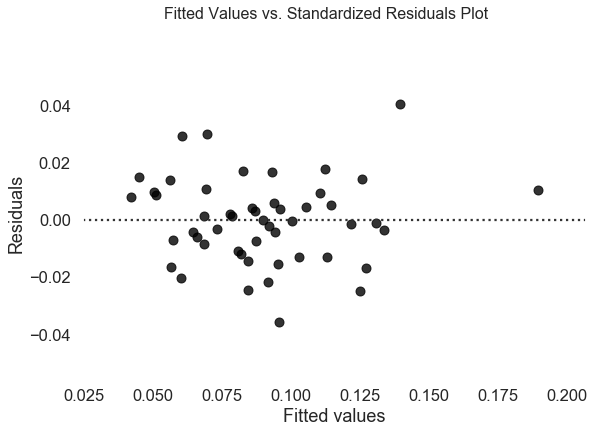

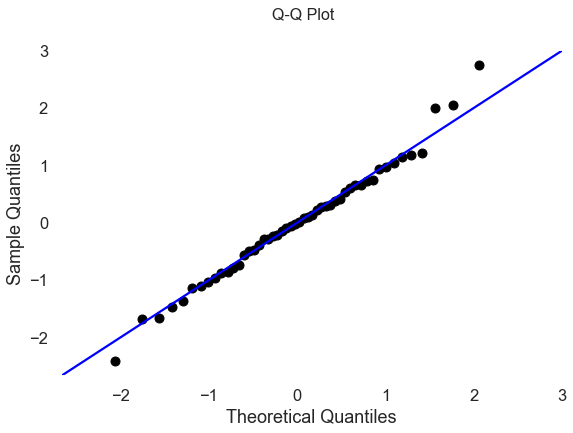

In [17]:
# Regression Diagnostics
# Fitted Values vs. Standardized Residuals Plot
fig, ax = plt.subplots(figsize=fig_size)
residuals = res.resid
fitted = res.fittedvalues
ax = sns.residplot(fitted, residuals, lowess=False, color='black')
ax.set(xlabel='Fitted values', ylabel='Residuals')
fig.suptitle('Fitted Values vs. Standardized Residuals Plot', size=16)


# Q-Q Plot 
fig, ax = plt.subplots(figsize=fig_size)
fig.suptitle('Q-Q Plot', size=16)



pplot = sm.ProbPlot(residuals,  fit=True,)
ax = pplot.qqplot(ax=ax, color='black')
sm.qqline(ax.axes[0], line='45', fmt='blue')